## Detecção de Fraude com Cartão de Crédito
fonte: [Fonte: ciencia programada](https://cienciaprogramada.com.br/2022/04/deteccao-fraudes-cartoes-credito/)

In [1]:
import pandas as pd
import matplotlib
import seaborn as sns
import numpy as np
import imblearn
import sklearn
from platform import python_version

packages = {'Pandas': pd, 'Matplotlib': matplotlib, 'Seaborn': sns, 'Numpy': np, 'Scikit-Learn': sklearn, 'Imbalanced-Learn': imblearn}

print('Versões das bibliotecas utilizadas no estudo:\n')
print('{0:-^20} | {1:-^10}'.format('', ''))
print('{0:^20} | {1:^10}'.format('Biblioteca', 'Versão'))
print('{0:-^20} | {1:-^10}'.format('', ''))

for name, alias in packages.items():
    print(f'{name:<20} | {alias.__version__:>10}')

print()
print('{0}: {1}'.format('Versão do Python', python_version()))

Versões das bibliotecas utilizadas no estudo:

-------------------- | ----------
     Biblioteca      |   Versão  
-------------------- | ----------
Pandas               |      1.5.3
Matplotlib           |      3.6.3
Seaborn              |     0.12.2
Numpy                |     1.24.1
Scikit-Learn         |      1.2.1
Imbalanced-Learn     |     0.10.1

Versão do Python: 3.11.1


In [2]:
# system
import os
import warnings
warnings.filterwarnings('ignore')

# plots
import matplotlib.pyplot as plt
from matplotlib.ticker import EngFormatter

# scaling
from sklearn.preprocessing import RobustScaler

# model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

# imbalanced
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# classifiers
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# metrics
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import auc
from sklearn.metrics import make_scorer
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [3]:
base_files = os.path.join(os.getcwd(), '..', 'data', 'files')

In [4]:
df = pd.read_csv(os.path.join(base_files, 'kaggle-creditcard.csv'), encoding='utf-8')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
print(f'Quantidade de entradas: {df.shape[0]}')
print(f'Quantidade de variáveis: {df.shape[1]}')

Quantidade de entradas: 284807
Quantidade de variáveis: 31


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
display(df.describe())

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [9]:
df[df == 0].count()

Time           2
V1             0
V2             0
V3             0
V4             0
V5             0
V6             0
V7             0
V8             0
V9             0
V10            0
V11            0
V12            0
V13            0
V14            0
V15            0
V16            0
V17            0
V18            0
V19            0
V20            0
V21            0
V22            0
V23            0
V24            0
V25            0
V26            0
V27            0
V28            0
Amount      1825
Class     284315
dtype: int64

In [10]:
df.groupby('Class').size()


Class
0    284315
1       492
dtype: int64

In [11]:
# percentual de cada classe
df.groupby('Class').size().transform(lambda x: x / x.sum()) * 100

Class
0    99.827251
1     0.172749
dtype: float64

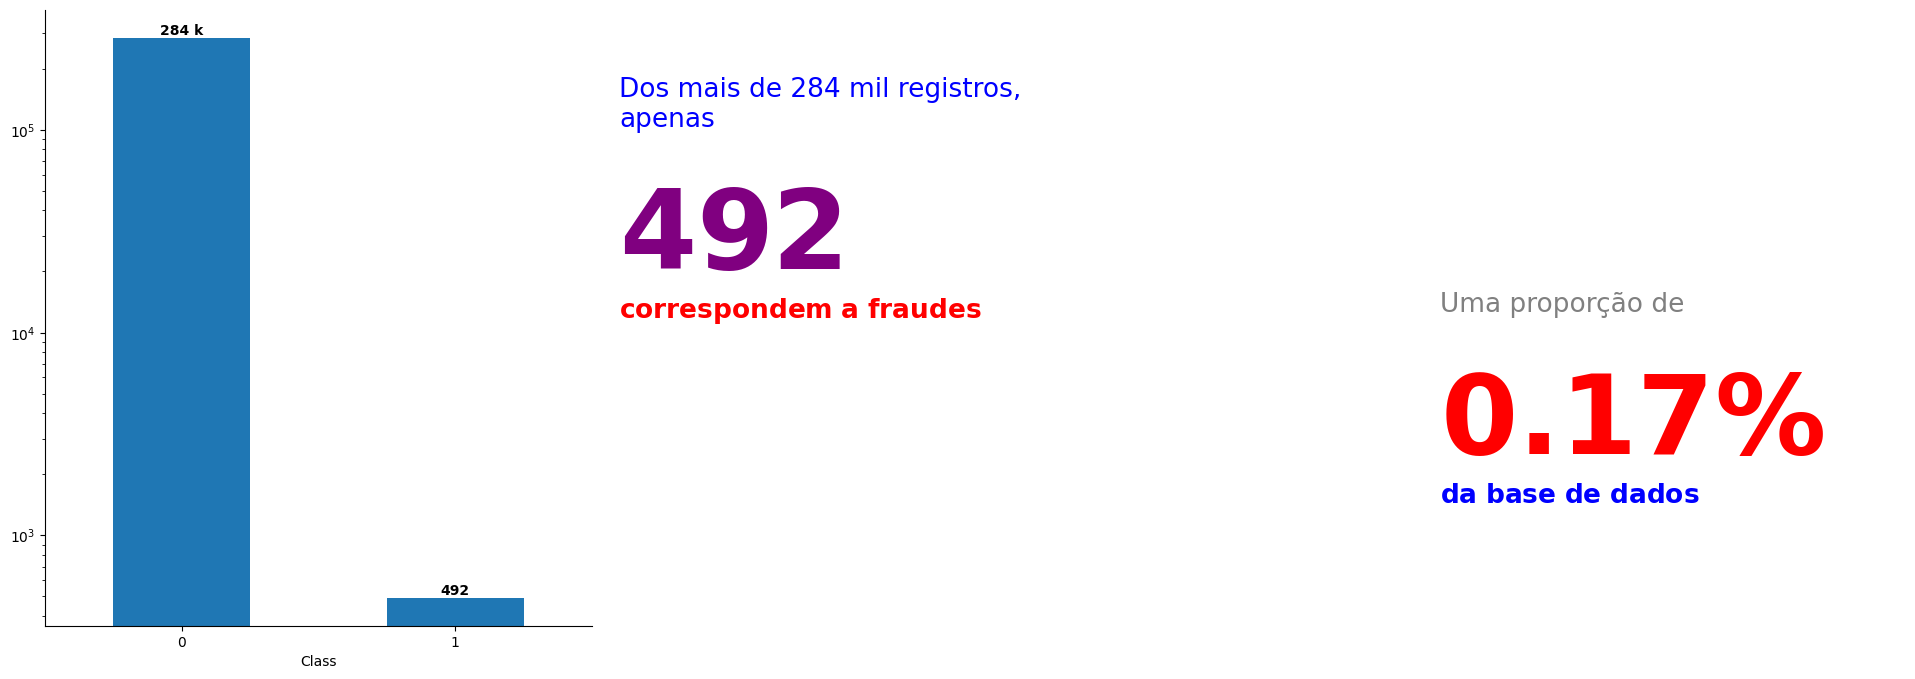

In [12]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, nrows=1, figsize=(24,8))

for ax in (ax2, ax3):
    ax.axis('off')

eng_format = EngFormatter(places=0)
labels = df.groupby('Class').size().values
temp = df.groupby('Class')['Class'].size()
temp.plot(kind='bar', ax=ax1)

ax1.yaxis.set_major_formatter(EngFormatter())
ax1.set_yscale('log')
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.tick_params(axis='x', labelrotation=0)

ax1.bar_label(ax1.containers[0], label_type='edge', labels=map(eng_format, labels), color='black', fontsize=10, weight='bold')

ax2.text(-0.15, 0.81, 'Dos mais de 284 mil registros, \napenas', fontsize=19, color='blue')
ax2.text(-0.15, 0.58, r'$\bf{492}$',  fontsize=80, color='purple')
ax2.text(-0.15, 0.5, r'$\mathrm{\bf{correspondem\ a\ fraudes}}$', fontsize=19, color='red') # use mathtext \\bf for bold text
ax3.text(0.15, 0.51, 'Uma proporção de', fontsize=19, color='gray')
ax3.text(0.15, 0.28, r'$\mathrm{\bf{0.17\%}}$',  fontsize=80, color='red')
ax3.text(0.15, 0.2, r'$\mathrm{\bf{da\ base\ de\ dados}}$', fontsize=19, color='blue') # use mathtext \\bf for bold text
plt.show()

In [13]:
params = {
    'lines.linewidth': 2.0,
    'axes.labelsize': 10,
    'axes.titlesize': 10,
    'axes.spines.top': False,
    'axes.spines.right': False,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'figure.autolayout': True,
    'figure.titlesize': 14,    
    'figure.figsize': (8, 6),
    'legend.shadow': False,    
    'legend.fontsize': 8,
}

plt.rcParams.update(params)

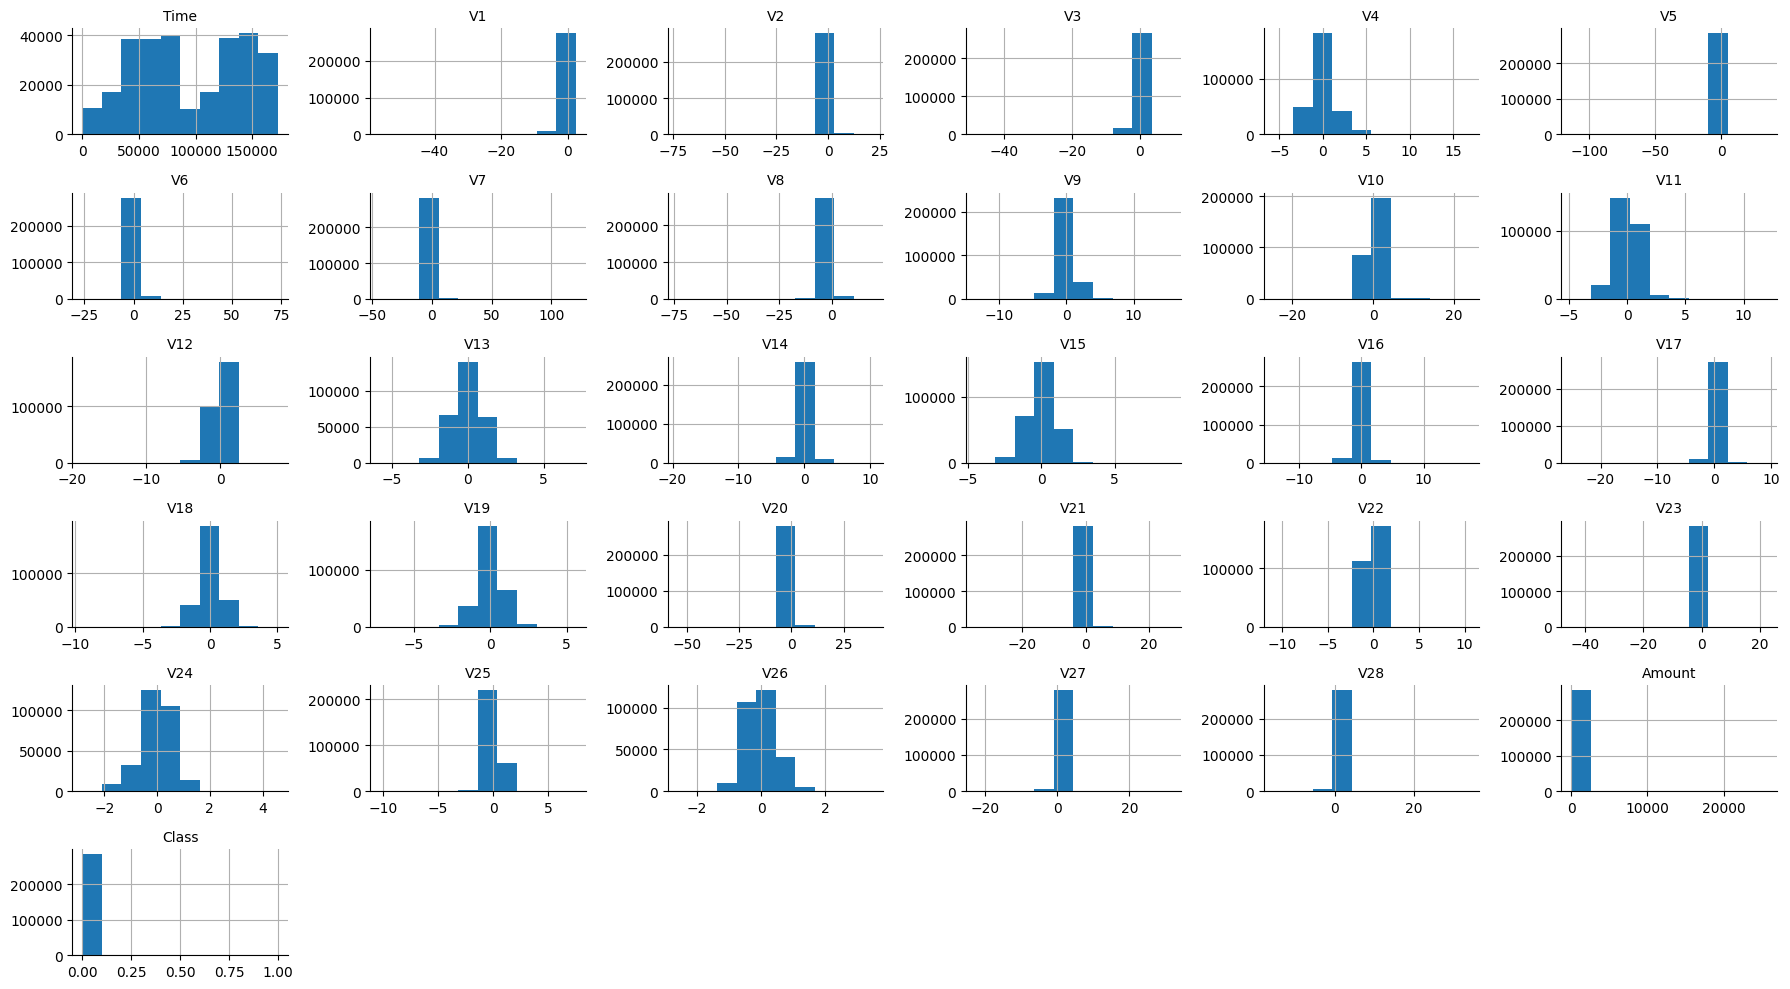

In [14]:
ax = df.hist(figsize=(18, 10))

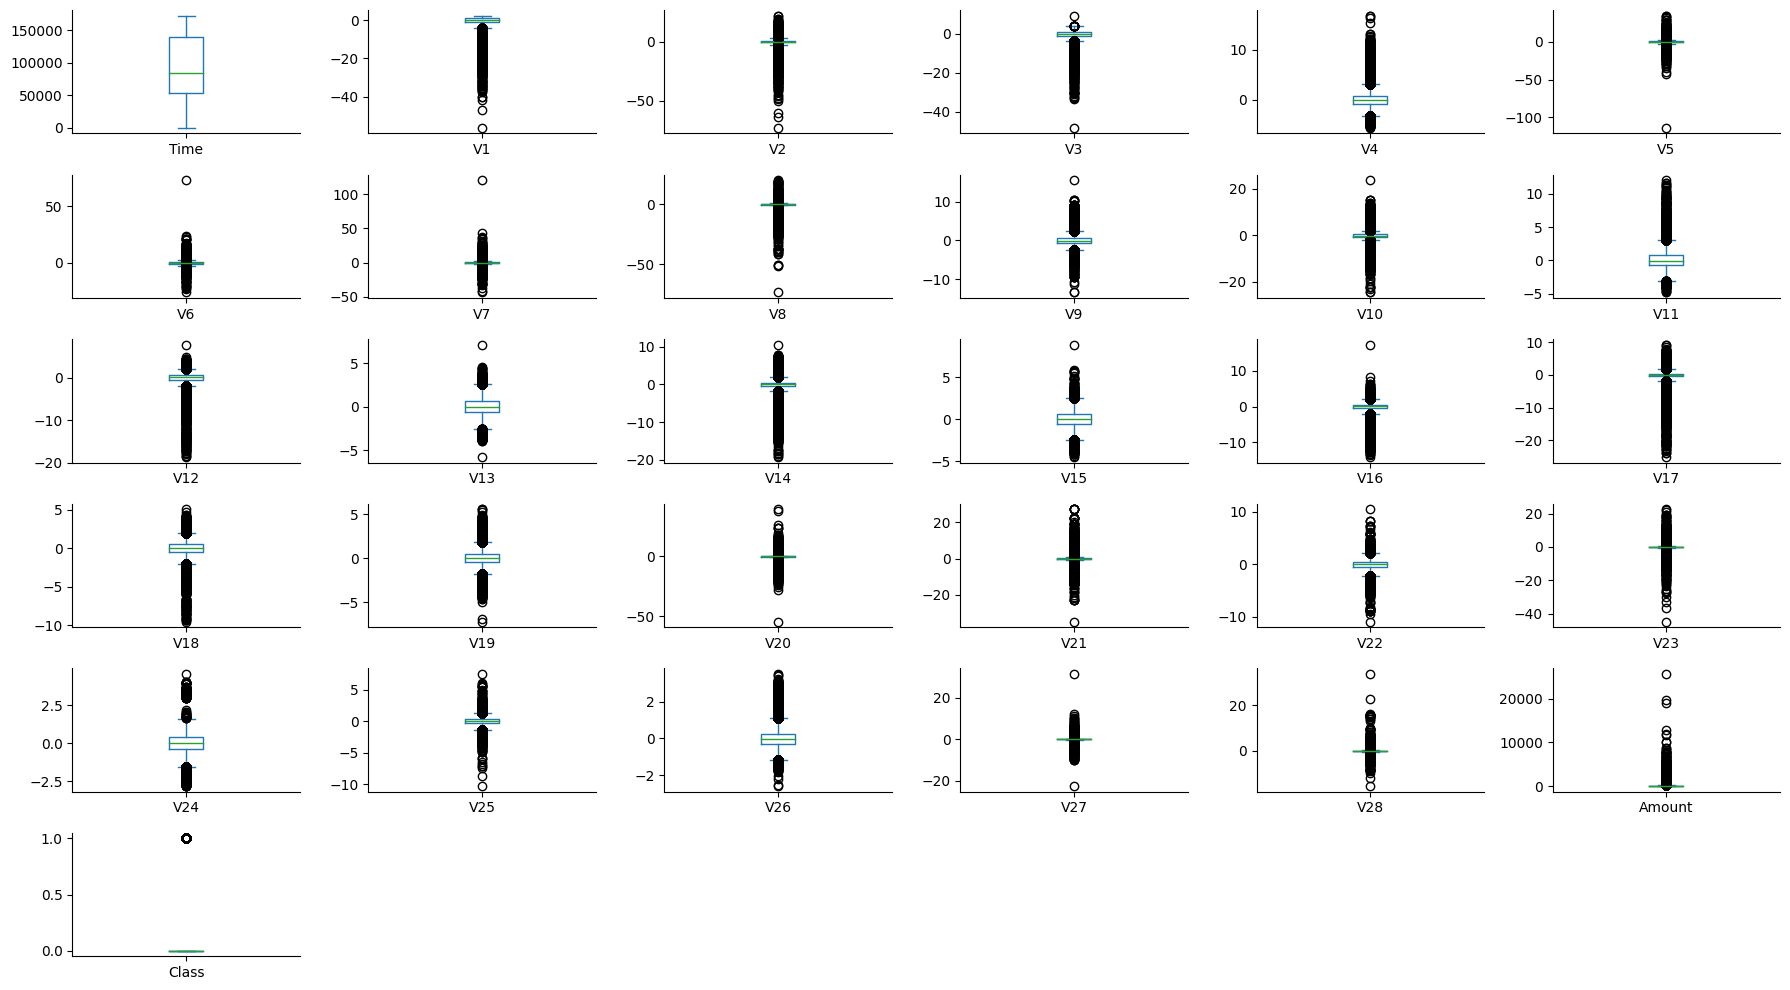

In [15]:
ax = df.plot(kind='box', subplots=True, layout=(6, 6), sharex=False, figsize=(18, 10))

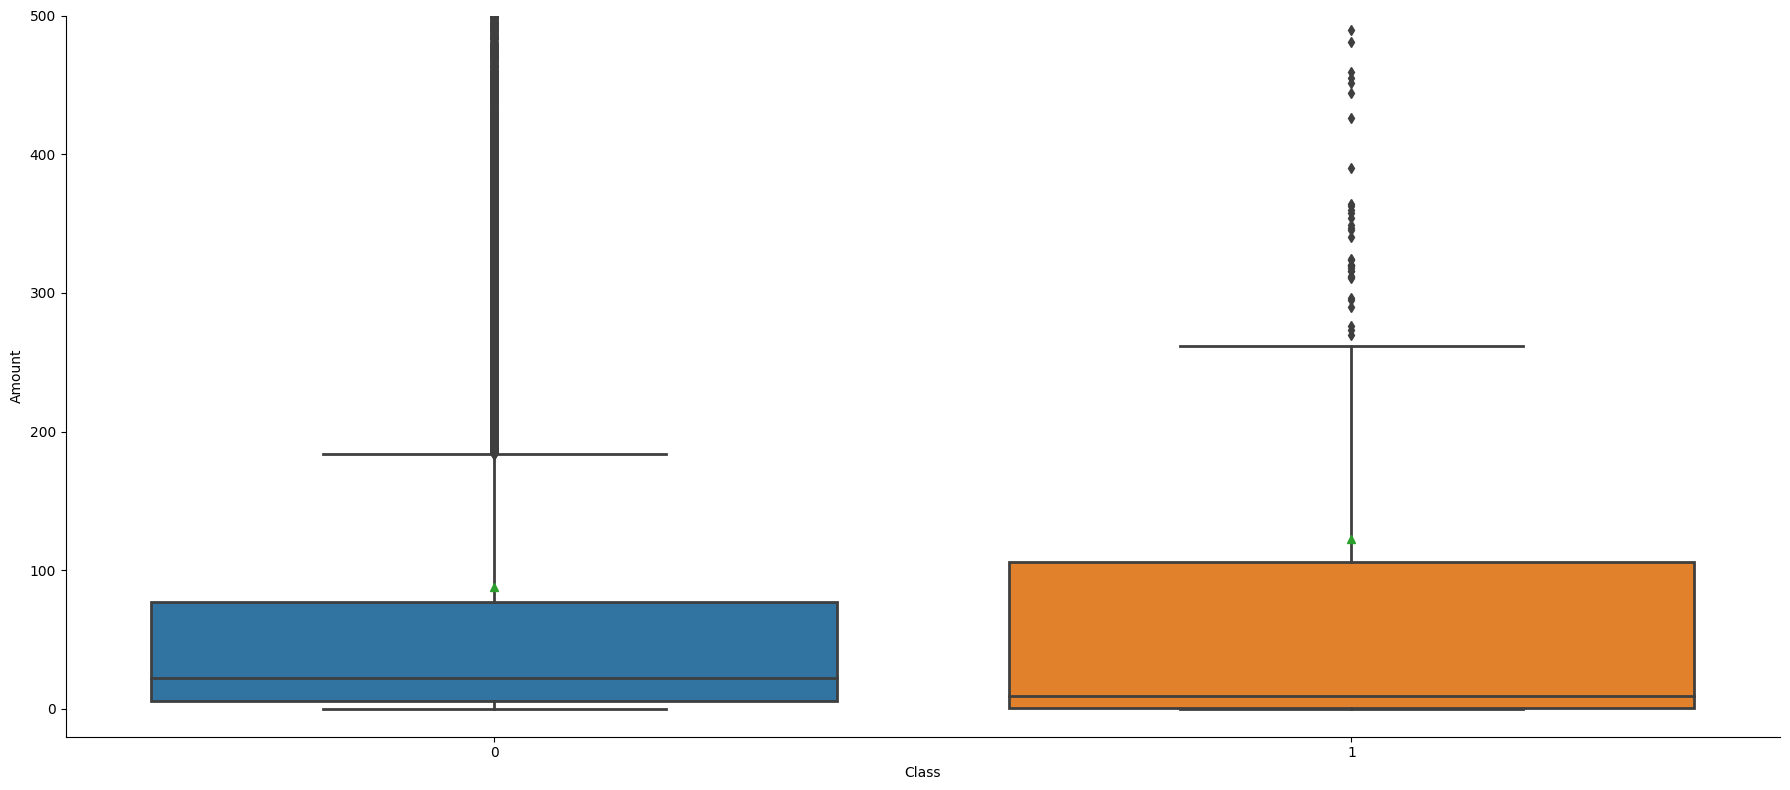

In [16]:
fig, ax = plt.subplots(sharex=True, figsize=(18, 8))

sns.boxplot(x=df['Class'], y=df['Amount'], showmeans=True, ax=ax)
ax.set_ylim((-20, 500))
plt.show()

In [17]:
df[(df['Class'] == 1)]['Amount'].describe()


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

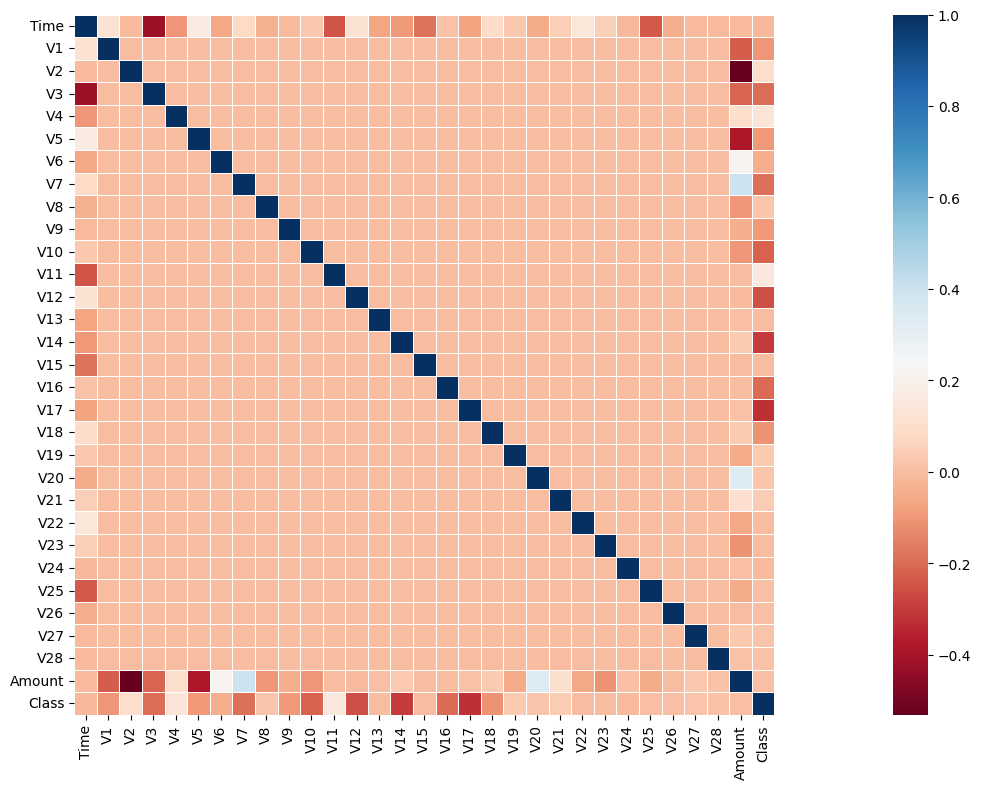

In [18]:
fig, ax = plt.subplots(figsize=(24, 8))
ax = sns.heatmap(df.corr(), square=True, annot=False, fmt='.1f', linecolor='white', linewidth=0.5, cmap='RdBu',)
plt.show()

In [19]:
rob_scaler = RobustScaler()

amount_reshape = df['Amount'].values.reshape(-1,1)
time_reshape = df['Time'].values.reshape(-1,1)

df['scaled_amount'] = rob_scaler.fit_transform(amount_reshape)
df['scaled_time'] = rob_scaler.fit_transform(time_reshape)

df_scaled = df.drop(['Time','Amount'], axis=1)

display(df_scaled.head())

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783274,-0.994983
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269825,-0.994983
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.983721,-0.994972
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418291,-0.994972
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670579,-0.994960


In [20]:
RANDOM_STATE = 42

In [21]:
X = df_scaled.drop('Class', axis=1)
y = df_scaled['Class']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,  stratify=y,  shuffle=True, random_state=RANDOM_STATE)

In [22]:
print(f'{np.bincount(y_train)} {np.bincount(y_test)}')

[213236    369] [71079   123]


In [23]:
print(f'{np.bincount(y_train) / sum(np.bincount(y_train)) * 100}')
print(f'{np.bincount(y_test)  / sum(np.bincount(y_test)) * 100}')

[99.82725123  0.17274877]
[99.82725204  0.17274796]


0    369
1    369
Name: Class, dtype: int64


<AxesSubplot: xlabel='Class', ylabel='count'>

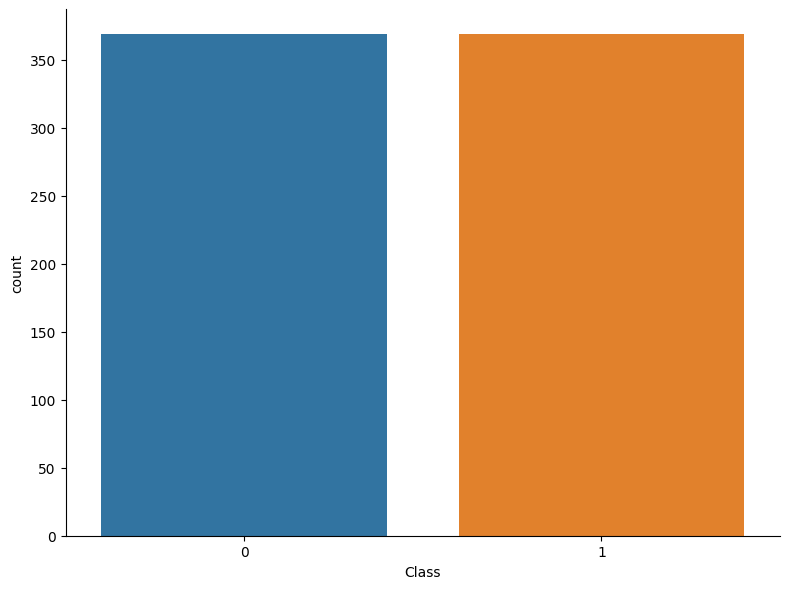

In [24]:
rus = RandomUnderSampler(random_state=RANDOM_STATE)
X_rus, y_rus = rus.fit_resample(X_train, y_train)

print(y_rus.value_counts())

ax = sns.countplot(x=y_rus)

In [25]:
df_balanced = pd.concat([X_rus, y_rus], axis=1)
df_balanced.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,scaled_amount,scaled_time,Class
0,-0.245994,0.864456,0.138314,-0.627707,0.440627,-1.072989,0.941862,-0.239466,0.197495,-0.168526,...,-0.640062,0.139061,-0.135690,-0.494629,0.127075,-0.017464,0.087222,-0.269825,0.765246,0
1,2.169390,-0.874467,-1.661547,-0.993435,-0.218378,0.253062,-1.196605,0.260048,0.130298,0.290238,...,0.530401,0.028349,-0.505492,-0.098210,-0.066314,0.010599,-0.029377,-0.055893,0.787028,0
2,-1.466046,0.946201,-1.508302,-0.918113,2.266431,0.770354,0.767603,0.618772,-0.806902,-0.968734,...,0.534899,-0.426521,-0.988301,0.270773,0.762529,-0.492720,0.112220,-0.167819,0.597657,0
3,-0.777055,-0.117475,0.723841,-3.492441,-0.052029,0.571674,-0.439675,-0.503063,-2.027951,0.902438,...,-0.705686,-0.395879,-0.442375,0.853427,-0.076788,0.281768,0.090274,-0.167680,0.592183,0
4,1.308457,-1.176200,-0.022869,-1.397037,-1.222895,-0.639747,-0.643778,-0.054389,-2.277189,1.584824,...,-0.995555,0.148532,0.143905,0.140944,-0.453468,-0.005713,0.013661,0.878921,-0.359649,0


In [26]:
df_balanced.shape

(738, 31)

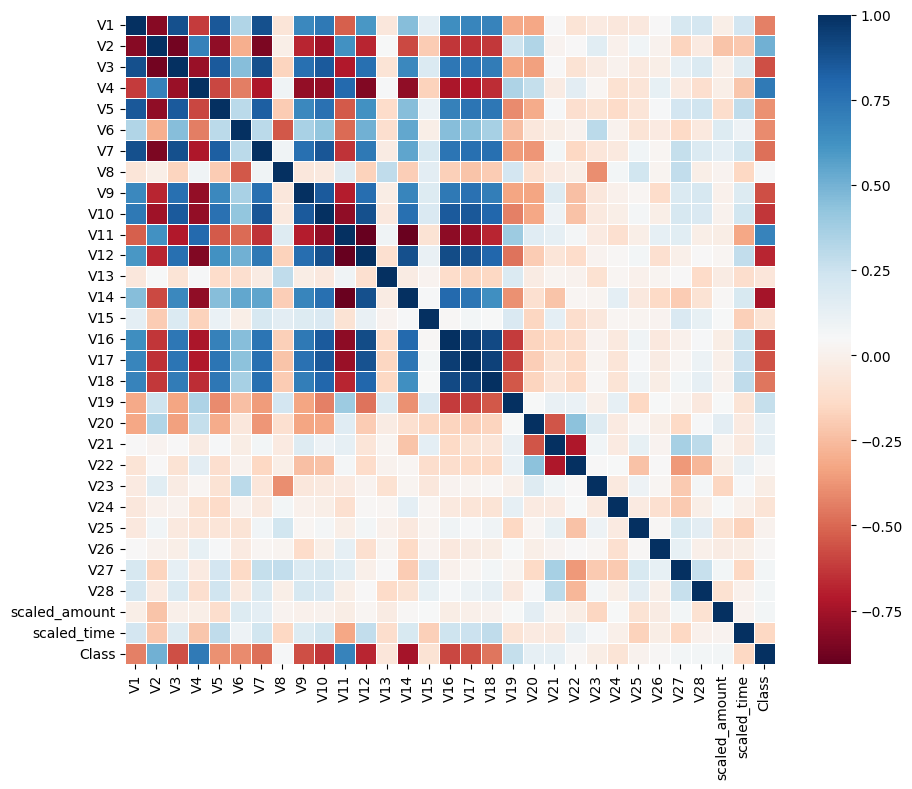

In [27]:
fig, ax = plt.subplots(figsize=(18, 8))
ax = sns.heatmap(df_balanced.corr(), square=True, annot=False, fmt='.1f', linecolor='white', linewidth=0.5, cmap='RdBu')
plt.show()

In [28]:
class_corr = df_balanced.corr()['Class']
class_corr.loc[lambda value: value < 0].sort_values()

V14           -0.749573
V12           -0.682799
V10           -0.632799
V16           -0.587845
V9            -0.571227
V3            -0.569337
V17           -0.561425
V7            -0.478392
V18           -0.466059
V1            -0.436271
V6            -0.407284
V5            -0.390976
scaled_time   -0.148974
V15           -0.090455
V24           -0.081980
V13           -0.069750
V23           -0.027070
Name: Class, dtype: float64

In [29]:
class_corr.loc[lambda value: value > 0].sort_values(ascending=False)

Class            1.000000
V4               0.719943
V11              0.685746
V2               0.503553
V19              0.276873
V20              0.132063
V21              0.129718
scaled_amount    0.075594
V27              0.073456
V28              0.071199
V8               0.060089
V26              0.038927
V22              0.035328
V25              0.008493
Name: Class, dtype: float64

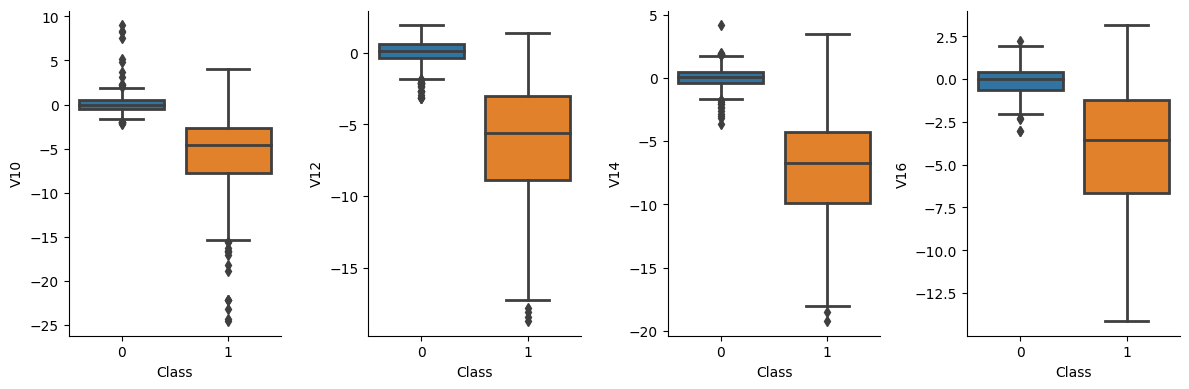

In [30]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(18, 4))

features_neg_corr = ('V10', 'V12', 'V14', 'V16')

for ax, feature in enumerate(features_neg_corr):
    sns.boxplot(x='Class', y=feature, data=df_balanced, ax=axes[ax])
    
plt.show()

Precisamos de uma função que possa calcular a AUPRC, já que não há nativamente no Scikit-Learn:

In [31]:
def pr_auc(y_true, y_proba):
    precision, recall, thresholds = precision_recall_curve(y_true, y_proba)
    return auc(recall, precision)

Vamos criar um dicionário com as métricas discutidas nesta seção. Embora já saibamos quais são relevantes no nosso contexto, vamos comparar os valores para ter uma visão mais completa do nosso problema.

In [32]:
scoring = {
    'accuracy' : make_scorer(accuracy_score), 
    'precision' : make_scorer(precision_score),
    'recall' : make_scorer(recall_score), 
    'f1_score' : make_scorer(f1_score),
    'auprc': make_scorer(pr_auc, needs_proba=True),
    'auroc': make_scorer(roc_auc_score),       
           }

### Definindo uma referência de performance
Vamos criar um baseline, uma referência, para nossa avaliação. Assim, sabemos que modelos que têm desempenho menor que nossa referência podem ser descartados.

Para criar nossa referência, usaremos a classe DummyClassifier do Scikit-Learn com a estratégia constant, recomendada como referência para classificadores que buscam ter boa performance em classes minoritárias segundo a documentação. Já vimos, na parte de preparo de dados de nosso estudo, que devemos usar estratégias estratificadas para que treino e teste tenham a mesma proporção entre as classes. Usamos, então, o RepeatedStratifiedKFold para fazer diversos splits (divisões) treino/teste e cross_validate para retornar o resultado consolidado de todas os splits por validação cruzada:

In [33]:
dummy_model = DummyClassifier(strategy='constant', constant=1)

rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=RANDOM_STATE)

scores = cross_validate(dummy_model, X, y, scoring=scoring, cv=rskf, n_jobs=-2)

In [34]:
print('{0:^15} | {1:^10} | {2:^10}'.format('Metric', 'Mean', 'Std Dev'))
print('-' * 40)

for key, _ in scoring.items():
    metric = ''.join(('test_', key))
    mean = np.mean(scores[metric])
    std_dev = np.std(scores[metric])
    print('{0:<15} | {1:^10.3f} | {2:^10.3f}'.format(key, mean, std_dev))

    Metric      |    Mean    |  Std Dev  
----------------------------------------
accuracy        |   0.002    |   0.000   
precision       |   0.002    |   0.000   
recall          |   1.000    |   0.000   
f1_score        |   0.003    |   0.000   
auprc           |   0.501    |   0.000   
auroc           |   0.500    |   0.000   


Veja que o auprc, que representa o AUPRC visto anteriormente, retornou valor 0.5. Ou seja, se comportou como um classificador aleatório. Escolheremos classificadores que se comportem melhor que este baseline.

Aplicando no dataset completo
Discutimos anteriormente que há potenciais ganhos em adotar estratégias de balanceamento de dataset quando temos casos onde uma das classes é muito menor que outra. Vamos, portanto, treinar alguns modelos no dataset completo, ou seja, desbalanceado, para que os resultados sirvam de base de comparação para os resultados que obteremos mais adiante com estratégias de balanceamento.

Para esse estudo, analisaremos seis algoritmos de classificação:

* Algoritmos lineares:
    * Regressão logística (Logistic Regression – LR)
    * Análise de discriminante linear (Linear Discriminat Analysis – LDA)
* Algorimos não lineares:
    * k vizinhos mais próximos (k-Nearest Neighbors – KNN)
    * Naive Bayes – NB
    * Árvore de decisão (Classification and Regression Trees – CART)
    * Máquina de vetores de suporte (Support Vector Machines – SVM)

Para o dataset completo, que possui mais de 280 mil entradas, não utilizaremos o KNN nem o SVM por serem algoritmos que demandam elevada potência computacional em grandes datasets. Os utilizaremos mais adiante, quando adotarmos estratégias de undersampling. Comecemos colocando nossos modelos em uma lista

In [35]:
models = []
models.append(('LR - Logistic Regression', LogisticRegression(max_iter=200)))
models.append(('LDA - Linear Discriminant Analysis', LinearDiscriminantAnalysis()))
models.append(('CART - Decision Tree Classifier', DecisionTreeClassifier()))
models.append(('NB - Gaussian Naive Bayes', GaussianNB()))

In [36]:
def evaluate_model(X, y, model):
    rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=RANDOM_STATE)
    scores = cross_validate(model, X, y, scoring=scoring, cv=rskf, n_jobs=-2)
    return scores

In [37]:
results = []
names = []

for name, model in models:
    names.append(name)
    scores = evaluate_model(X, y, model)
    results.append(scores)
    
for name, result in zip(names, results):
    print(name)
    print('{0:^15} | {1:^10} | {2:^10}'.format('Metric', 'Mean', 'Std Dev'))
    print('-' * 40)
    for key in scoring.keys():
        metric = ''.join(('test_', key))
        mean = np.mean(result[metric])
        std_dev = np.std(result[metric])    
        print('{0:<15} | {1:^10.3f} | {2:^10.3f}'.format(key, mean, std_dev))
    print()

LR - Logistic Regression
    Metric      |    Mean    |  Std Dev  
----------------------------------------
accuracy        |   0.999    |   0.000   
precision       |   0.875    |   0.034   
recall          |   0.624    |   0.044   
f1_score        |   0.727    |   0.027   
auprc           |   0.758    |   0.024   
auroc           |   0.812    |   0.022   

LDA - Linear Discriminant Analysis
    Metric      |    Mean    |  Std Dev  
----------------------------------------
accuracy        |   0.999    |   0.000   
precision       |   0.866    |   0.026   
recall          |   0.766    |   0.018   
f1_score        |   0.812    |   0.013   
auprc           |   0.782    |   0.025   
auroc           |   0.883    |   0.009   

CART - Decision Tree Classifier
    Metric      |    Mean    |  Std Dev  
----------------------------------------
accuracy        |   0.999    |   0.000   
precision       |   0.754    |   0.030   
recall          |   0.762    |   0.030   
f1_score        |   0.758  

Veja que todos os modelos obtiveram resultados de acurácia muito altos.  
Isto corrobora o discutido anteriormente sobre o paradoxo da acurácia,  
 mostrando porque tal métrica não é adequada com datasets desbalanceados.  

Também vemos que os valores de AUROC de todos os modelos são elevados.   
No entanto, Naive Bayes, modelo com maior AUROC, possui o menor AUPRC.   
Inclusive, menor que nosso baseline. Vemos, aqui, a importância de   
utilizar métricas que sejam condizentes com o problema a ser resolvido.

É bastante comum representar os resultados de modelos de classificação  
binária na forma de matrizes de confusão. Como estamos fazendo uma  
estratégia de repetição, vamos criar uma função que retorne a média  
dos resultados das repetições:

In [38]:
def mean_confusion_matrices(X, y, model, normalize=None):
    rsk = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=RANDOM_STATE)
    cm_arrays = []
    
    for train_index, test_index in rsk.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        model.fit(X_train, y_train)
        cm = confusion_matrix(y_test, model.predict(X_test), normalize=normalize)
        cm_arrays.append(cm)
    
    return np.mean(cm_arrays, axis=0)

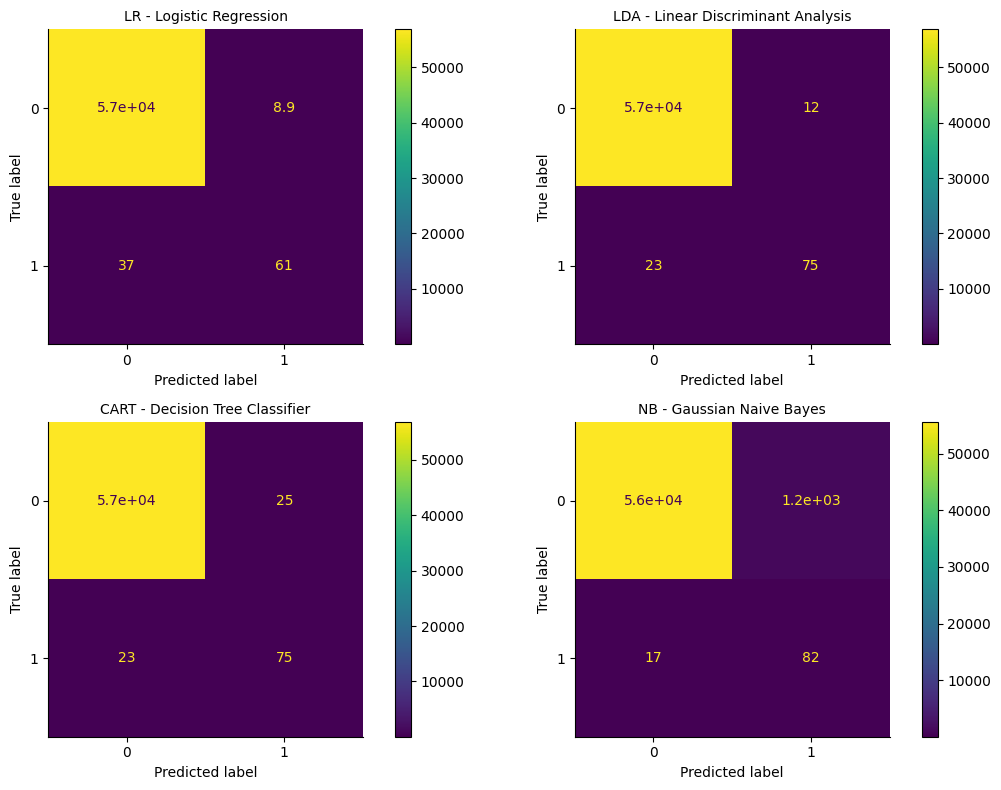

In [39]:
names = []
cm_means = []

for name, model in models:
    names.append(name)    
    cm_means.append(mean_confusion_matrices(X, y, model))
    
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

for ax, name, matrix in zip(axes.flatten(), names, cm_means):
    ConfusionMatrixDisplay(matrix).plot(ax=ax)
    ax.set_title(name)

Veja como o modelo Naive Bayes tem um número muito maior de falsos positivos.

Vamos gerar as matrizes de confusão normalizadas para visualizar melhor  
as proporções. Nesse tipo de matriz, a soma de cada linha da matriz é 1

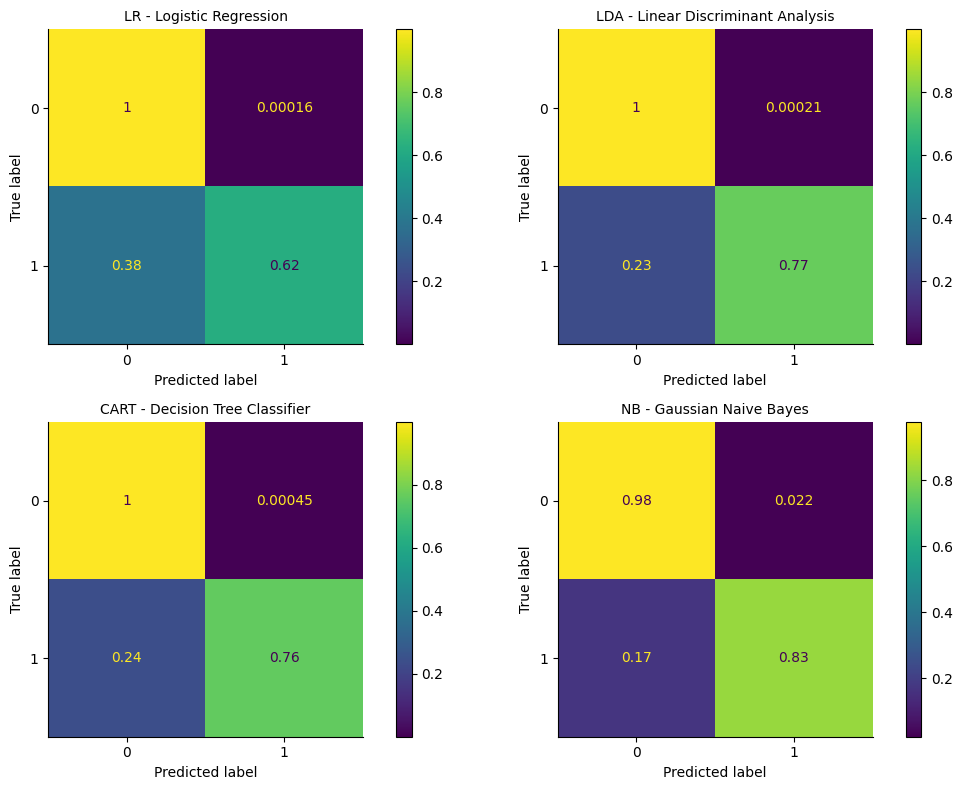

In [40]:
names = []
cm_means_norm = []

for name, model in models:
    names.append(name)    
    cm_means_norm.append(mean_confusion_matrices(X, y, model, normalize='true'))
    
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

for ax, name, matrix in zip(axes.flatten(), names, cm_means_norm):
    ConfusionMatrixDisplay(matrix).plot(ax=ax)
    ax.set_title(name)

Acredito que essa forma de visualizar permite uma melhor comparação  
entre os modelos, permitindo compreender a proporção dos resultados.   
Perceba como o Naive Bayes foi o único que teve uma fração  
significativa de falsos positivos, o que levou ao seu menor  
valor de AUPRC comparado aos demais modelos.

### Aplicando undersampling

Vimos anteriormente que a estratégia de undersampling para balancear  
o dataset permitiu descobrir correlações entre variáveis.No entanto  
fazer apenas uma divisão de treino/teste e aplicar o undersampling  
não é o ideal. O ideal, sempre que possível, é fazer várias divisões  
e avaliar o consolidado. Assim, precisamos aplicar o undersampling  
em cada divisão realizada. Para isso, usaremos a função a seguir na  
qual criamos um pipeline para utilizar o RandomUnderSampler do  
Imbalanced-Learn em cada divisão antes de se avaliar os modelos:

In [41]:
def evaluate_model_undersampling(X, y, model):
    steps = [('under', RandomUnderSampler(random_state=RANDOM_STATE)), 
             ('model', model)]
    pipeline = Pipeline(steps=steps)
    
    # apenas 2 splits, pois temos poucas entradas para classe 1
    rskf = RepeatedStratifiedKFold(n_splits=2, n_repeats=3, random_state=RANDOM_STATE)
    scores = cross_validate(pipeline, X, y, scoring=scoring, cv=rskf, n_jobs=-2)
    return scores

Agora, incluiremos os modelos KNN e SVM (SVC no Scikit-Learn, onde o “C” significa classifier) tendo em vista que estaremos com datasets menores:

In [42]:
models = []
models.append(('LR - Logistic Regression', LogisticRegression(max_iter=200)))
models.append(('LDA - Linear Discriminant Analysis', LinearDiscriminantAnalysis()))
models.append(('CART - Decision Tree Classifier', DecisionTreeClassifier()))
models.append(('NB - Gaussian Naive Bayes', GaussianNB()))
models.append(('SVC- Support Vector Classification', SVC(probability=True)))

In [43]:
results = []
names = []

for name, model in models:
    names.append(name)
    scores = evaluate_model_undersampling(X, y, model)
    results.append(scores)

for name, result in zip(names, results):
    print(name)
    print('{0:^15} | {1:^10} | {2:^10}'.format('Metric', 'Mean', 'Std Dev'))
    print('-' * 40)

    for key in scoring.keys():
        metric = ''.join(('test_', key))
        mean = np.mean(result[metric])
        std_dev = np.std(result[metric])
        print('{0:<15} | {1:^10.3f} | {2:^10.3f}'.format(key, mean, std_dev))
    print()



LR - Logistic Regression
    Metric      |    Mean    |  Std Dev  
----------------------------------------
accuracy        |   0.961    |   0.006   
precision       |   0.040    |   0.007   
recall          |   0.912    |   0.015   
f1_score        |   0.077    |   0.013   
auprc           |   0.578    |   0.100   
auroc           |   0.937    |   0.005   

LDA - Linear Discriminant Analysis
    Metric      |    Mean    |  Std Dev  
----------------------------------------
accuracy        |   0.980    |   0.004   
precision       |   0.070    |   0.014   
recall          |   0.839    |   0.017   
f1_score        |   0.129    |   0.024   
auprc           |   0.171    |   0.047   
auroc           |   0.910    |   0.007   

CART - Decision Tree Classifier
    Metric      |    Mean    |  Std Dev  
----------------------------------------
accuracy        |   0.895    |   0.009   
precision       |   0.015    |   0.001   
recall          |   0.900    |   0.021   
f1_score        |   0.029  

Agora, seguindo nossos objetivos, vamos selecionar os modelos com maior AUPRC:


In [44]:
models = []
models.append(('LR', LogisticRegression(max_iter=200)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVC', SVC(probability=True)))

Vamos modificar nossa função de geração de matrizes de confusão para utilizar undersampling:

In [45]:
def mean_confusion_matrices_undersampling(X, y, model, normalize=None):
    rus = RandomUnderSampler(random_state=RANDOM_STATE)
    
    rskf = RepeatedStratifiedKFold(n_splits=2, n_repeats=3, random_state=RANDOM_STATE)
    cm_arrays = []
    
    for train_index, test_index in rskf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        X_rus, y_rus = rus.fit_resample(X_train, y_train)
        model.fit(X_rus, y_rus)
        cm = confusion_matrix(y_test, model.predict(X_test), normalize=normalize)
        cm_arrays.append(cm)
    
    return np.mean(cm_arrays, axis=0)

Agora, podemos gerar as matrizes para os três modelos selecionados:



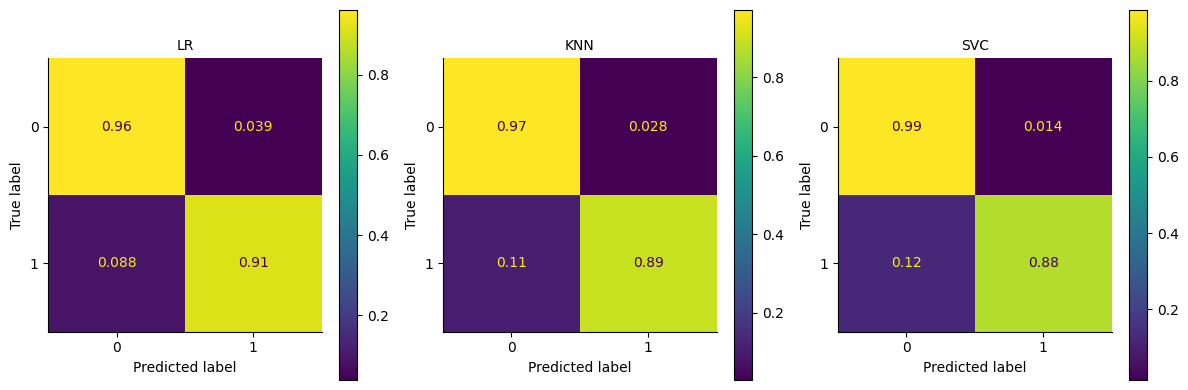

In [46]:
names = []
cm_means_norm = []

for name, model in models:
    names.append(name)    
    cm_means_norm.append(mean_confusion_matrices_undersampling(X, y, model, normalize='true'))
    
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

for ax, name, matrix in zip(axes.flatten(), names, cm_means_norm):
    ConfusionMatrixDisplay(matrix).plot(ax=ax)
    ax.set_title(name)

Veja que os três modelos escolhidos foram mais eficazes em prever os casos verdadeiros de fraude do que os modelos aplicados ao dataset completo. Ou seja, resultaram em maiores valores de recall. Em especial, a regressão logística, LR, conseguiu detectar mais casos verdadeiros de fraude do que o mesmo modelo aplicado ao dataset completo. No entanto, isto levou a um aumento de falsos positivos quando comparado ao mesmo modelo no dataset completo. Como já descrito anteriormente, este trade-off é uma constante neste tipo de análise.

### Otimizando os hiperparâmetros dos modelos escolhidos

Hiperparâmetros são parâmetros de modelos que devem ser definidos antes de treinar o modelo. Utilizaremos o GridSearchCV do Scikit-Learn que irá testar todas as combinações possíveis dos hiperparâmetros passados. Em seguida, retornará a combinação de hiperparâmetros que resultou em menor erro para a métrica escolhida.

Assim, primeiro precisamos criar uma função que irá performar a busca por esta combinação de hiperparâmetros:

In [47]:
def grid_search_undersampling(X, y, model, params, scoring='roc_auc'):
    rus = RandomUnderSampler(random_state=RANDOM_STATE)
    
    rskf = RepeatedStratifiedKFold(n_splits=2, n_repeats=3, random_state=RANDOM_STATE)   
        
    for train_index, test_index in rskf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        X_rus, y_rus = rus.fit_resample(X_train, y_train)
        search = GridSearchCV(model, params, scoring=scoring)
        search.fit(X_rus, y_rus)
        
    return search.best_estimator_

Iremos fazer esta otimização com os três modelos escolhidos anteriormente. Para cada um deles, passaremos diversas opções de hiperparâmetros que serão exaustivamente combinadas entre si pelo GridSearchCV:

In [48]:

models = []

models.append(('LR', 
               LogisticRegression(max_iter=700),
               [{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                'class_weight': [None, 'balanced'],
                'penalty': ['l1'], 
                'solver': ['liblinear', 'saga']},
               {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                'class_weight': [None, 'balanced'],
                'penalty': ['l2'], 
                'solver': ['lbfgs', 'newton-cg', 'sag']}]))

models.append(('KNN', 
               KNeighborsClassifier(),
               {'n_neighbors': list(range(2, 6, 1)), 
                'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                'weights': ['uniform', 'distance']}))

models.append(('SVC', 
               SVC(probability=True),
               {'C': [0.5, 0.7, 0.9, 1], 
                'kernel': ['rbf', 'poly', 'sigmoid', 'linear'],
                'class_weight': [None, 'balanced'],}))

### Métrica: AUPRC
o `GridSearchCV` retorna os melhores hiperparâmetro de acordo com algumas métricas.  
Como estamos discutindo desde o início desde capitulo, a AUPRC é uma métrica que tem  
se mostrado mais adequando ao nosso contexto. Vejamos os melhores hiperparâmetros

In [49]:
results = []
names = []

for name, model, params in models:
    names.append(name)
    scores = grid_search_undersampling(X, y, model, params, scoring=make_scorer(pr_auc, needs_proba=True))
    results.append(scores)

results

/home/kakashi/.local/.venv3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/kakashi/.local/.venv3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/kakashi/.local/.venv3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/kakashi/.local/.venv3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/kakashi/.local/.venv3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/kakashi/.local/.venv3/lib/python3.

[LogisticRegression(C=0.001, max_iter=700),
 KNeighborsClassifier(),
 SVC(C=0.5, probability=True)]

Vamos, criar uma lista com nossos modelos configurados com estes hiperparâmetros otimizados

In [50]:
models = []
models.append(('LR - Logistic Regression', LogisticRegression(max_iter=700, C=0.001)))
models.append(('KNN - KNeighborsClassifier', KNeighborsClassifier()))
models.append(('SVC - Support Vector Classification', SVC(probability=True, C=0.5)))

In [51]:
results = []
names = []

for name, model in models:
    names.append(name)
    scores = evaluate_model_undersampling(X, y, model)
    results.append(scores)

for name, result in zip(names, results):
    print(name)
    print('{0:^15} | {1:^10} | {2:^10}'.format('Metric', 'Mean', 'Std Dev'))
    print('-' * 40)
    for key in scoring.keys():
        metric = ''.join(('test_', key))
        mean = np.mean(result[metric])
        std_dev = np.std(result[metric])    
        print('{0:<15} | {1:^10.3f} | {2:^10.3f}'.format(key, mean, std_dev))
    print()

LR - Logistic Regression
    Metric      |    Mean    |  Std Dev  
----------------------------------------
accuracy        |   0.998    |   0.000   
precision       |   0.479    |   0.067   
recall          |   0.825    |   0.004   
f1_score        |   0.603    |   0.053   
auprc           |   0.702    |   0.027   
auroc           |   0.911    |   0.002   

KNN - KNeighborsClassifier
    Metric      |    Mean    |  Std Dev  
----------------------------------------
accuracy        |   0.972    |   0.007   
precision       |   0.056    |   0.012   
recall          |   0.894    |   0.019   
f1_score        |   0.105    |   0.021   
auprc           |   0.601    |   0.065   
auroc           |   0.933    |   0.008   

SVC - Support Vector Classification
    Metric      |    Mean    |  Std Dev  
----------------------------------------
accuracy        |   0.989    |   0.002   
precision       |   0.124    |   0.018   
recall          |   0.859    |   0.009   
f1_score        |   0.217    | 

Vemos que, efetivamente, os valores AUPRC para LR e SVC estão maiores do que antes da otimização. O KNN permanece inalterado pois a otimização resultou nos hiperparâmetros que já são utilizados por padrão no modelo. Vejamos isto em matrizes de confusão normalizadas:

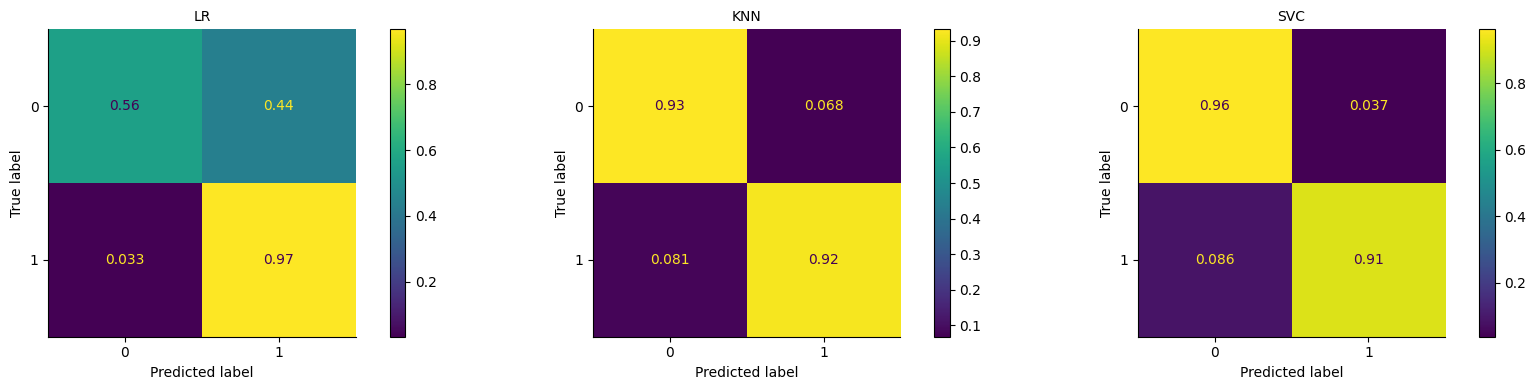

In [61]:
names = []
cm_means_norm = []

for name, model in models:
    names.append(name)    
    cm_means_norm.append(mean_confusion_matrices_undersampling(X, y, model, normalize='true'))
    
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 4))

for ax, name, matrix in zip(axes.flatten(), names, cm_means_norm):
    ConfusionMatrixDisplay(matrix).plot(ax=ax)
    ax.set_title(name)

Conforme estamos discutindo durante todo o estudo, há um trade-off entre precisão e recall. Assim, para os modelos LR e SVC, o resultado foi um aumento da precisão e diminuição do recall, com a consequente diminuição dos falsos positivos e aumento dos falsos negativos.

Mas, e se escolhêssemos maximizar a detecção de casos de fraude?

Métrica: recall
Muitos podem pensar que uma determinada instituição financeira iria buscar maximizar a detecção de fraude, ou seja, aumentar o recall minimizando os falsos negativos. Vejamos as consequências desta estratégia. Vamos, novamente, listar os hiperparâmetros que serão analisados pelo grid search:

In [62]:
models = []

models.append(('LR - Logistic Regression', 
               LogisticRegression(max_iter=700),
               [{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                'class_weight': [None, 'balanced'],
                'penalty': ['l1'], 
                'solver': ['liblinear', 'saga']},
               {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                'class_weight': [None, 'balanced'],
                'penalty': ['l2'], 
                'solver': ['lbfgs', 'newton-cg', 'sag']}]))

models.append(('KNN - KNeighbors Classifier', 
               KNeighborsClassifier(),
               {'n_neighbors': list(range(2, 6, 1)), 
                'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                'weights': ['uniform', 'distance']}))

models.append(('SVC - Support Vector Classifier', 
               SVC(probability=True),
               {'C': [0.5, 0.7, 0.9, 1], 
                'kernel': ['rbf', 'poly', 'sigmoid', 'linear'],
                'class_weight': [None, 'balanced'],}))

In [63]:
results = []
names = []

for name, model, params in models:
    names.append(name)
    scores = grid_search_undersampling(X, y, model, params, scoring='recall')
    results.append(scores)

/home/kakashi/.local/.venv3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/kakashi/.local/.venv3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/kakashi/.local/.venv3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/kakashi/.local/.venv3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/kakashi/.local/.venv3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/kakashi/.local/.venv3/lib/python3.

In [56]:
models = []
models.append(('LR - Logistic Regression', LogisticRegression(max_iter=700, C=0.01, penalty='l1', solver='liblinear')))
models.append(('KNN - KNeighbors Classifier', KNeighborsClassifier(n_neighbors=2, weights='distance')))
models.append(('SVC - Support Vector Classifier', SVC(probability=True, C=0.5, kernel='linear',)))

In [57]:
results = []
names = []

for name, model in models:
    names.append(name)
    scores = evaluate_model_undersampling(X, y, model)
    results.append(scores)
    
for name, result in zip(names, results):
    print(name)
    print('{0:^15} | {1:^10} | {2:^10}'.format('Metric', 'Mean', 'Std Dev'))
    print('-' * 40)
    for key in scoring.keys():
        metric = ''.join(('test_', key))
        mean = np.mean(result[metric])
        std_dev = np.std(result[metric])    
        print('{0:<15} | {1:^10.3f} | {2:^10.3f}'.format(key, mean, std_dev))
    print()

LR
    Metric      |    Mean    |  Std Dev  
----------------------------------------
accuracy        |   0.563    |   0.007   
precision       |   0.004    |   0.000   
recall          |   0.967    |   0.012   
f1_score        |   0.008    |   0.000   
auprc           |   0.682    |   0.020   
auroc           |   0.765    |   0.007   

KNN
    Metric      |    Mean    |  Std Dev  
----------------------------------------
accuracy        |   0.932    |   0.007   
precision       |   0.023    |   0.002   
recall          |   0.919    |   0.014   
f1_score        |   0.045    |   0.004   
auprc           |   0.482    |   0.010   
auroc           |   0.926    |   0.004   

SVC
    Metric      |    Mean    |  Std Dev  
----------------------------------------
accuracy        |   0.963    |   0.008   
precision       |   0.043    |   0.008   
recall          |   0.914    |   0.014   
f1_score        |   0.081    |   0.014   
auprc           |   0.527    |   0.136   
auroc           |   0.93

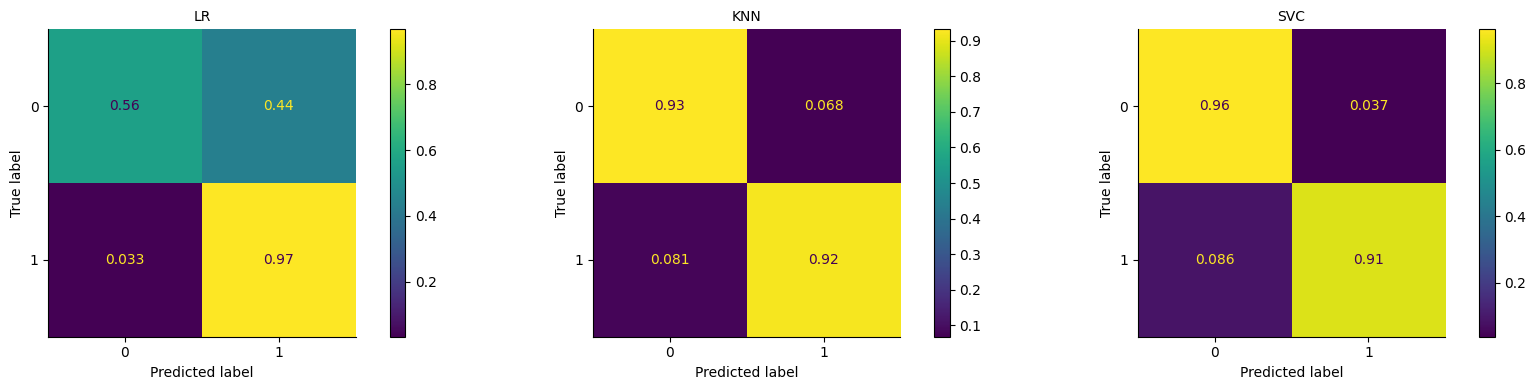

In [60]:
names = []
cm_means_norm = []

for name, model in models:
    names.append(name)    
    cm_means_norm.append(mean_confusion_matrices_undersampling(X, y, model, normalize='true'))
    
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 4))

for ax, name, matrix in zip(axes.flatten(), names, cm_means_norm):
    ConfusionMatrixDisplay(matrix).plot(ax=ax)
    ax.set_title(name)

Observe que a regressão logística teve o maior valor de recall, mas o custo foi ter uma proporção significativa de falsos positivos. Seria este o cenário ideal? Os demais modelos também tiveram um aumento nos falsos positivos comparado ao cenário anterior onde maximizamos o AUPRC, mas em menor escala. O SVC possui a melhor precisão.

Devemos maximizar o recall?
Ao classificar erroneamente uma transação fraudulenta como legítima, um usuário teve seu dinheiro roubado via, por exemplo, clonagem do cartão. A compania do cartão terá que reembolsar o usuário. Por outro lado, uma transação legítima ser considerada fraudulenta significa que o usuário terá seu cartão bloqueado indevidamente, causando conflito, constrangimento e desconforto no cliente.

Os dois cenários possuem custos distintos e o ideal seria fazer uma análise de valor esperado para cada modelo considerando tais custos. Não temos tais dados para o dataset em estudo, mas o aprendizado vale para qualquer contexto. Não há uma métrica que é a resposta para todos os contextos, cada caso deve ser analisado separadamente.